## Classification on the revenue intention of users based on their online activity
#### Using XB-Boost classifier, Random forest classifier with SMOTETOMEK resampler and Voting classifier on the two previous classifiers.

The given dataset user_activity_data.csv, contains shoppers’ onlineactivity information including clickstream and session information data, where the last column **Revenue** represents visitors’ purchasing intention.

In [3]:
# Load the Pandas libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read data from file
df = pd.read_csv("user_activity_data.csv")

# Preview the first 5 rows of the data 
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# Preview descriptive statistics for each column
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
#Check if there are any null / Nan values in the dataset

df.isnull().values.any()

False

<AxesSubplot:xlabel='Revenue', ylabel='count'>

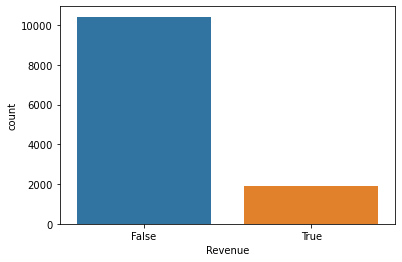

In [5]:
# Show the size of each class(True/False) to see if balanced
sns.countplot(x='Revenue', data=df)

#### Need to balance the classes, True class is way smaller than the False class

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

target = 'Revenue'
X = df.drop([target], axis = 1)
y = df[target]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

# Claculate the class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

# Calculate the class weight difference for using it later as import parameter on re-sampling
class_weight_difference = max(class_weights) / min(class_weights)

print(class_weight_difference)

[0.59154299 3.23095737]


5.461914744933613

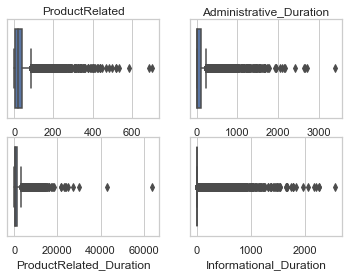

In [37]:
fig, axes = plt.subplots(2, 2)

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df["ProductRelated"], ax=axes[0, 0])
ax.xaxis.set_label_position('top')

ax = sns.boxplot(x=df["Administrative_Duration"], ax=axes[0, 1])
ax.xaxis.set_label_position('top')

ax = sns.boxplot(x=df["ProductRelated_Duration"], ax=axes[1, 0])

ax = sns.boxplot(x=df["Informational_Duration"], ax=axes[1, 1])

The box-plots above show some outliers in the dataset, specifically for the duration data.Outliers may give reasonable information sometimes, although, dealing with them may lead to better performance for the model.


<AxesSubplot:>

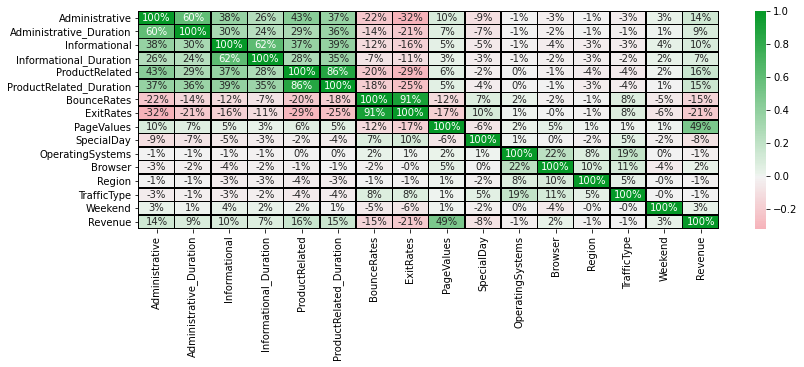

<Figure size 936x288 with 0 Axes>

In [8]:
# Calculate the correlation matrix
corr = df.corr()
# Plot the heatmap, green is positive correlation, red is negative correlation, white is no correlation
fig, ax = plt.subplots(figsize=(13,4))
rdgn = sns.diverging_palette(h_neg=10, h_pos=130, s=99, l=55, sep=3, as_cmap=True)

plt.figure(figsize = (13,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        cmap=rdgn, center=0.00, annot=True, fmt ='.0%', 
        linewidths=.5, linecolor='black', cbar=True, ax=ax)

# Maybe examine correlation between two variables explicitly
# PageValues and Revenue

The heat-map shows high-correlation between somecolumns; it can be assumed that those pairs suffer from multicollinearity, although ensempling classifiers are using regularization techniques to overcome this issue. 

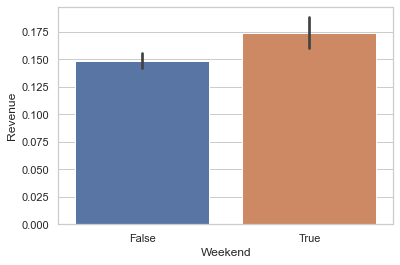

In [39]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Weekend", y="Revenue", data=df)

Some variables give reasonable information for a classification task. The bar-plot above shows that on weekends the overall revenue is higher than the other days. Other variables like operating systems (see bar-plot below) provide uncertain information for humans' logic. Although, most classification algorithms assign lower importance weights on each variable based on the impact they make. Because of that and because variety of data is important for classification tasks, I chose not to remove any columns.

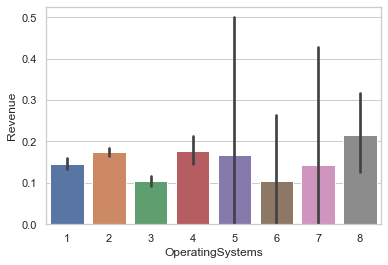

In [40]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="OperatingSystems", y="Revenue", data=df)

### Model implementation
#### Random-Forest Classifier /SMOTE-TOMEK
For thefirst implementation I chose the Random-Forest Classifier together with SMOTE-TOMEK for resampling. Random-Forest is an ensemble of decision tree models which uses averaging on eachsubset of features to improve the predictive accuracy.I chose this classifier because by using subsets it controls over-fitting and it also works well with high dimensional data, which means that it is an algorithm which can handle future expansion of the dataset.

For overcoming the imbalanced classes problem, I chose to use the imblearn’s library SMOTE-TOMEK function. This resampling technique is a combination of over-and under-sampling using SMOTE and Tomek links. Over-sampling methods create new synthetic samples in the minority class, whereas under-sampling is cleaning the data by deleting or merging samples in the majority class. These two techniques can be more effective when both are used together.

              precision    recall  f1-score   support

       False       0.96      0.91      0.93      2606
        True       0.61      0.78      0.69       477

    accuracy                           0.89      3083
   macro avg       0.79      0.84      0.81      3083
weighted avg       0.90      0.89      0.89      3083

Best Parameters: 
{'resample__sampling_strategy': 'auto', 'preprocessor__cont__scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'log2', 'classifier__max_depth': 200, 'classifier__criterion': 'entropy'}

Best Test Score using mean cross validation: 
0.6697310767092531

All Test Scores: 
[0.63553314 0.66547644 0.66316996 0.66973108 0.6500804  0.66851766
 0.65446151 0.64324459 0.64853889 0.63075546]

accuracy score is :  0.8897178073305222
roc_auc score is :  0.8431361428472594
f1 score is :  0.6851851851851851


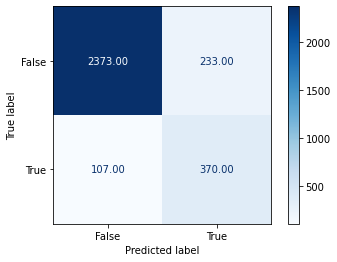

In [ ]:
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler

from imblearn.combine import SMOTETomek

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

import pandas as pd
import numpy as np
import pprint

# Read data from file
df = pd.read_csv("user_activity_data.csv")

target = 'Revenue'
X = df.drop([target], axis = 1)
y = df[target]

# split the dataset using stratify to keep consistancy in the class sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

# Create a pipeline for the pre-processing of the continuous data
continuous_transformer = Pipeline(steps = [
   ('scaler', RobustScaler())])

# Create a pipeline for the pre-processing of the categorical data
categorical_transformer = Pipeline(steps = [
   ('lab_enc', OneHotEncoder(handle_unknown='ignore'))])

# Seperate the categorical features from the continuous features
categorical_features = ['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'TrafficType']
continuous_features = list(set(X.columns.values) - set(categorical_features))

# Use the ColumnTransformer to apply the transformations to the correct columns in the dataframe.
preprocessor = ColumnTransformer(
   transformers=[
       ('cont', continuous_transformer, continuous_features),
       ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that combines the preprocessor created above with a classifier.
base = Pipeline(steps=[('preprocessor', preprocessor),
                       ('resample', SMOTETomek()),
                       ('classifier', RandomForestClassifier())])

# Params grid to check for best hyperparameters or transformers
param_grid = {
    'preprocessor__cont__scaler': [RobustScaler(), MinMaxScaler()],
    'classifier__n_estimators': [100, 190, 200, 210],
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__max_depth': ['None', 190, 200],
    'classifier__min_samples_split': [2, 4, 5, 6],
    'classifier__min_samples_leaf': [1, 2, 3, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'resample__sampling_strategy': ['auto', 0.25, 0.30, 0.40]
    }

# Call the randomizes search with the parameter scoring for the decision to be made based on f1-score
grid_search = RandomizedSearchCV(base, param_distributions = param_grid, scoring='f1')

# Train the model
grid_search.fit(X_train, y_train)

# Predict using the trained model
y_pred = grid_search.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

plot_confusion_matrix(grid_search, X_test, y_test, cmap = "Blues", values_format = '.2f')

# Returns the score on the given data, if the estimator has been refit.
grid_search.score(X_test, y_test) 

print("Best Parameters: \n{}\n".format(grid_search.best_params_))
print("Best Test Score using mean cross validation: \n{}\n".format(grid_search.best_score_))
print("All Test Scores: \n{}\n".format(grid_search.cv_results_['mean_test_score']))

print('accuracy score is : ', accuracy_score(y_test, y_pred))
print('roc_auc score is : ', roc_auc_score(y_test, y_pred))
print('f1 score is : ', f1_score(y_test, y_pred))

### XG - Boost Classifier

I chose to use XG-Boost because it uses an ensemble technique where new models are added to correct the errors made by existing models, achieving surprisingly high performance while at the same time it focuses on computational speed.

scale_pos_weight parameter controls the balance of the classes.

              precision    recall  f1-score   support

       False       0.95      0.94      0.94      2606
        True       0.68      0.71      0.69       477

    accuracy                           0.90      3083
   macro avg       0.81      0.82      0.82      3083
weighted avg       0.91      0.90      0.90      3083

Best Parameters: 
{'preprocessor__cont__scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), 'classifier__subsample': 0.3, 'classifier__scale_pos_weight': 1.5, 'classifier__min_child_weight': 15, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.01, 'classifier__gamma': 0.9, 'classifier__colsample_bytree': 1}

Best Test Score using mean cross validation: 
0.68409111711225

All Test Scores: 
[0.65824243 0.68409112 0.63067008 0.65189452 0.         0.65626789
 0.64358863 0.6827863  0.61533206 0.64543604]

accuracy score is :  0.9036652611093091
roc_auc score is :  0.8239830354399057
f1 score is : 

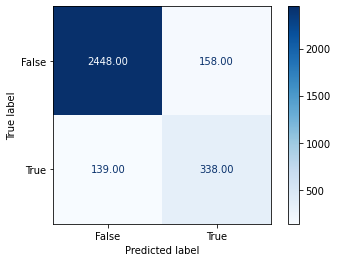

In [ ]:
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler

from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

import pandas as pd
import numpy as np

# Read data from file
df = pd.read_csv("user_activity_data.csv")

target = 'Revenue'
X = df.drop([target], axis = 1)
y = df[target]

# split the dataset using stratify to keep consistancy in the class sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

# Create a pipeline for the pre-processing of the continuous data
continuous_transformer = Pipeline(steps = [
   ('scaler', RobustScaler())])

# Create a pipeline for the pre-processing of the categorical data
categorical_transformer = Pipeline(steps = [
   ('lab_enc', OneHotEncoder(handle_unknown='ignore'))])

# Seperate the categorical features from the continuous features
categorical_features = ['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'TrafficType']
continuous_features = list(set(X.columns.values) - set(categorical_features))

# Use the ColumnTransformer to apply the transformations to the correct columns in the dataframe.
preprocessor = ColumnTransformer(
   transformers=[
       ('cont', continuous_transformer, continuous_features),
       ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that combines the preprocessor created above with a classifier.
base = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', XGBClassifier())])

# Params grid to check for best hyperparameters or transformers
param_grid = {
    'preprocessor__cont__scaler': [RobustScaler(), MinMaxScaler()],
    'classifier__scale_pos_weight' : [1.5],
    'classifier__max_depth' : [6,7,8],
    'classifier__learning_rate' : [0.01, 0.5],
    'classifier__gamma' : [0, 0.6, 0.9, 1],
    'classifier__min_child_weight' : [1, 10, 12, 15],
    'classifier__subsample' : [0.3, 0.4, 0.6, 1],
    'classifier__colsample_bytree' : [0.1, 0.5, 1]
    }

# Call the randomizes search with the parameter scoring for the decision to be made based on f1-score
grid_search = GridSearchCV(base, param_grid=param_grid, scoring='f1')

# Train the model
grid_search.fit(X_train, y_train)

#Predict using the trained model
y_pred = grid_search.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

plot_confusion_matrix(grid_search, X_test, y_test, cmap = "Blues", values_format = '.2f')

# Returns the score on the given data, if the estimator has been refit.
grid_search.score(X_test, y_test) 

print("Best Parameters: \n{}\n".format(grid_search.best_params_))
print("Best Test Score using mean cross validation: \n{}\n".format(grid_search.best_score_))
print("All Test Scores: \n{}\n".format(grid_search.cv_results_['mean_test_score']))

print('accuracy score is : ', accuracy_score(y_test, y_pred))
print('roc_auc score is : ', roc_auc_score(y_test, y_pred))
print('f1 score is : ', f1_score(y_test, y_pred))

### Voting Classifier

After getting satisfactory results from the two previous classifiers, I decided to try both of them in a voting classifier using the soft parameter to cause the final prediction to be based on probabilities. Its methodology utilizes the collective judgment of multiple classifiers for predicting data points. I chose to select the parameters that the grid search evaluated as the best parameters for the previous two classifiers and tune the parameters of the voting classifier.

              precision    recall  f1-score   support

       False       0.95      0.92      0.94      2606
        True       0.65      0.76      0.70       477

    accuracy                           0.90      3083
   macro avg       0.80      0.84      0.82      3083
weighted avg       0.91      0.90      0.90      3083

Best Parameters: 
{'VotingClassifier__weights': [3, 2], 'preprocessor__cont__scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}

Best Test Score using mean cross validation: 
0.6872441916049417

All Test Scores: 
[       nan        nan 0.67346187 0.68025587 0.68014564 0.6832591
 0.68156613 0.68724419 0.67038428 0.68264112]

accuracy score is :  0.898799870256244
roc_auc score is :  0.8408011828854877
f1 score is :  0.6982591876208897


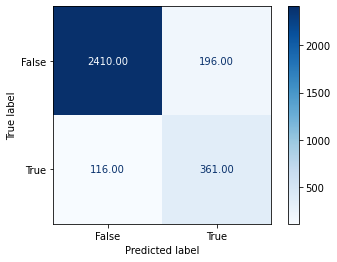

In [ ]:
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler

from imblearn.combine import SMOTETomek

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

import pandas as pd
import numpy as np

# Read data from file
df = pd.read_csv("user_activity_data.csv")

target = 'Revenue'
X = df.drop([target], axis = 1)
y = df[target]

# split the dataset using stratify to keep consistancy in the class sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

# Create a pipeline for the pre-processing of the continuous data
continuous_transformer = Pipeline(steps = [
   ('scaler', RobustScaler())])

# Create a pipeline for the pre-processing of the categorical data
categorical_transformer = Pipeline(steps = [
   ('lab_enc', OneHotEncoder(handle_unknown='ignore'))])

# Seperate the categorical features from the continuous features
categorical_features = ['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'TrafficType']
continuous_features = list(set(X.columns.values) - set(categorical_features))

# Use the ColumnTransformer to apply the transformations to the correct columns in the dataframe.
preprocessor = ColumnTransformer(
   transformers=[
       ('cont', continuous_transformer, continuous_features),
       ('cat', categorical_transformer, categorical_features)])

# Assign the above classifier for adding them later in the VotingClassifier pipeline
# The assign parameters arise from the output of the previous two models
xgb_clf = XGBClassifier(subsample = 0.3, scale_pos_weight = 1.5, min_child_weight = 15, max_depth = 6, learning_rate = 0.01, gamma = 0.9, colsample_bytree = 1)
SMOTETOMEK_rf_clf = Pipeline([('resample', SMOTETomek()), 
                              ('smotetomek_rf', RandomForestClassifier(n_estimators = 200, min_samples_split= 5, min_samples_leaf= 4, max_features= 'log2', max_depth= 200, criterion= 'entropy'))])

# Create a pipeline that combines the preprocessor created above with a classifier.
base = Pipeline(steps=[('preprocessor', preprocessor),
                       ('VotingClassifier', VotingClassifier(estimators=[ ('xgb', xgb_clf), ('smotetomek_rf', SMOTETOMEK_rf_clf)], voting='soft'))])

# Params grid to check for best hyperparameters or transformers
param_grid = {
    'preprocessor__cont__scaler': [RobustScaler(), MinMaxScaler()],
    'VotingClassifier__weights': ['None', [1, 2], [2,1], [3, 2], [2, 3]]
    }

# Call the grid search with the parameter scoring for the decision to be made based on f1-score
grid_search = GridSearchCV(base, param_grid=param_grid, scoring='f1')

# Train the model
grid_search.fit(X_train, y_train)

# Predict using the trained model
y_pred = grid_search.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

plot_confusion_matrix(grid_search, X_test, y_test, cmap = "Blues", values_format = '.2f')

# Returns the score on the given data, if the estimator has been refit.
grid_search.score(X_test, y_test)

print("Best Parameters: \n{}\n".format(grid_search.best_params_))
print("Best Test Score using mean cross validation: \n{}\n".format(grid_search.best_score_))
print("All Test Scores: \n{}\n".format(grid_search.cv_results_['mean_test_score']))

print('accuracy score is : ', accuracy_score(y_test, y_pred))
print('roc_auc score is : ', roc_auc_score(y_test, y_pred))
print('f1 score is : ', f1_score(y_test, y_pred))

### Conclusion

In conclusion, voting classifier ended up achieving the best f1-score for the whole classification task but more specifically a higher score for the ‘True’ class which is considered the most important class for this task. We also conclude that the voting classifier does a good job at combining two strong classifiers and achieving a better score than the two individually by using probabilities (soft parameter). It is also important to mention that ensemble algorithms seem to handle pretty good issues like outliers, overfitting and highly correlated features. Finally, combining over-sampling with under-sampling is also a really efficient technique for dealing with imbalanced classes.